In [1]:
import pandas as pd
from datetime import datetime
import json
import numpy as np

# Forecasted v actual sales

In [2]:
PATH = "./suncharge/Forecast.csv"
df = pd.read_csv(PATH)
PATH = "./suncharge/Sales.csv"
df2 = pd.read_csv(PATH)

In [46]:
data = df[["Quantity","MaterialKey", "PlantKey","RequestedDeliveryMonth"]]
data = data.values
data2 = df2[["OrderQuantity","MaterialKey", "PlantKey","SalesOrderCreationDate"]]
data2 = data2.values

In [47]:
print(data)
print(len(data2))
options = []
for i in data2:
    if i[3] not in options:
        options.append(i[3])
print(sorted(options))

[[15978 1 4 '2022-01-01']
 [5360 1 5 '2022-01-01']
 [5170 1 6 '2022-01-01']
 ...
 [3129 2 6 '2025-12-01']
 [19 2 7 '2025-12-01']
 [2116 2 8 '2025-12-01']]
100000
['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08', '2022-01-09', '2022-01-10', '2022-01-11', '2022-01-12', '2022-01-13', '2022-01-14', '2022-01-15', '2022-01-16', '2022-01-17', '2022-01-18', '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-22', '2022-01-23', '2022-01-24', '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28', '2022-01-29', '2022-01-30', '2022-01-31', '2022-02-01', '2022-02-02', '2022-02-03', '2022-02-04', '2022-02-05', '2022-02-06', '2022-02-07', '2022-02-08', '2022-02-09', '2022-02-10', '2022-02-11', '2022-02-12', '2022-02-13', '2022-02-14', '2022-02-15', '2022-02-16', '2022-02-17', '2022-02-18', '2022-02-19', '2022-02-20', '2022-02-21', '2022-02-22', '2022-02-23', '2022-02-24', '2022-02-25', '2022-02-26', '2022-02-27', '2022-02-28', '2022-03-01

In [48]:
def month(data):
    # Convert date strings to datetime objects
    new_data = []
    for i in range(len(data)):
        ti= datetime.strptime(data[i,3], '%Y-%m-%d')
        data[i,3] = (ti.month,ti.year)



    # Return the number of days as absolute value
    return data

data = month(data)
data2 = month(data2)

In [50]:
print(data)
print(data2)

[[15978 1 4 (1, 2022)]
 [5360 1 5 (1, 2022)]
 [5170 1 6 (1, 2022)]
 ...
 [3129 2 6 (12, 2025)]
 [19 2 7 (12, 2025)]
 [2116 2 8 (12, 2025)]]
[[26 1 4 (10, 2024)]
 [20 1 5 (5, 2023)]
 [13 1 5 (3, 2022)]
 ...
 [17 2 8 (12, 2022)]
 [20 1 4 (6, 2022)]
 [23 1 4 (10, 2024)]]


In [51]:
months = range(1,13)
years = range(2022,2026)
plants = range(4,9)
materials = range(1,3)


forecast_dict = {str(year): {str(month): {str(plant): {str(material): 0 for material in materials} for plant in plants} for month in months} for year in years}
sales_dict = {str(year): {str(month): {str(plant): {str(material): 0 for material in materials} for plant in plants} for month in months} for year in years}



In [52]:
print(sales_dict)

{'2022': {'1': {'4': {'1': 0, '2': 0}, '5': {'1': 0, '2': 0}, '6': {'1': 0, '2': 0}, '7': {'1': 0, '2': 0}, '8': {'1': 0, '2': 0}}, '2': {'4': {'1': 0, '2': 0}, '5': {'1': 0, '2': 0}, '6': {'1': 0, '2': 0}, '7': {'1': 0, '2': 0}, '8': {'1': 0, '2': 0}}, '3': {'4': {'1': 0, '2': 0}, '5': {'1': 0, '2': 0}, '6': {'1': 0, '2': 0}, '7': {'1': 0, '2': 0}, '8': {'1': 0, '2': 0}}, '4': {'4': {'1': 0, '2': 0}, '5': {'1': 0, '2': 0}, '6': {'1': 0, '2': 0}, '7': {'1': 0, '2': 0}, '8': {'1': 0, '2': 0}}, '5': {'4': {'1': 0, '2': 0}, '5': {'1': 0, '2': 0}, '6': {'1': 0, '2': 0}, '7': {'1': 0, '2': 0}, '8': {'1': 0, '2': 0}}, '6': {'4': {'1': 0, '2': 0}, '5': {'1': 0, '2': 0}, '6': {'1': 0, '2': 0}, '7': {'1': 0, '2': 0}, '8': {'1': 0, '2': 0}}, '7': {'4': {'1': 0, '2': 0}, '5': {'1': 0, '2': 0}, '6': {'1': 0, '2': 0}, '7': {'1': 0, '2': 0}, '8': {'1': 0, '2': 0}}, '8': {'4': {'1': 0, '2': 0}, '5': {'1': 0, '2': 0}, '6': {'1': 0, '2': 0}, '7': {'1': 0, '2': 0}, '8': {'1': 0, '2': 0}}, '9': {'4': {'1

In [53]:
i = 0
for item in data:
    
    forecast_dict[str(item[3][1])][str(item[3][0])][str(item[2])][str(item[1])] += item[0]
print(len(data2))
for item in data2:
    if item[3][0] == 1 and item[3][1] == 2022:
        i+=1
    sales_dict[str(item[3][1])][str(item[3][0])][str(item[2])][str(item[1])] += item[0]

100000


In [54]:
i

2810

In [55]:
result = {}
result = {str(year): {str(month): {str(plant): {str(material): {"difference": \
                (forecast_dict[str(year)][str(month)][str(plant)][str(material)]\
                -sales_dict[str(year)][str(month)][str(plant)][str(material)])\
                ,"forecast": forecast_dict[str(year)][str(month)][str(plant)][str(material)], "sales":sales_dict[str(year)][str(month)][str(plant)][str(material)]} \
                for material in materials} for plant in plants} for month in months} for year in years}
print(result)

{'2022': {'1': {'4': {'1': {'difference': -12, 'forecast': 15978, 'sales': 15990}, '2': {'difference': -671, 'forecast': 3710, 'sales': 4381}}, '5': {'1': {'difference': -2977, 'forecast': 5360, 'sales': 8337}, '2': {'difference': -533, 'forecast': 1465, 'sales': 1998}}, '6': {'1': {'difference': -3284, 'forecast': 5170, 'sales': 8454}, '2': {'difference': -372, 'forecast': 1970, 'sales': 2342}}, '7': {'1': {'difference': -85, 'forecast': 180, 'sales': 265}, '2': {'difference': -43, 'forecast': 11, 'sales': 54}}, '8': {'1': {'difference': 148, 'forecast': 6966, 'sales': 6818}, '2': {'difference': 66, 'forecast': 1746, 'sales': 1680}}}, '2': {'4': {'1': {'difference': -5725, 'forecast': 9854, 'sales': 15579}, '2': {'difference': -686, 'forecast': 3463, 'sales': 4149}}, '5': {'1': {'difference': -2998, 'forecast': 4008, 'sales': 7006}, '2': {'difference': -323, 'forecast': 1624, 'sales': 1947}}, '6': {'1': {'difference': -816, 'forecast': 7278, 'sales': 8094}, '2': {'difference': -96, 'f

In [56]:
with open("./data_arnaud.json", "w") as json_file:
    json.dump(result, json_file,indent=2)

# Inventory compared to safety stock

In [82]:
import matplotlib.pyplot as plt
import numpy as np

In [58]:
PATH = "./suncharge/Inventory.csv"
df = pd.read_csv(PATH)

In [65]:
data = df[["MaterialPlantKey", "GrossInventoryQuantity"]]
data = data.values

In [66]:
print(data)

[[1.00040000e+04 1.75300000e+03]
 [1.00050000e+04 7.94000000e+02]
 [1.00060000e+04 1.54300000e+03]
 [1.00070000e+04 1.05000000e+02]
 [1.00080000e+04 1.02800000e+03]
 [2.00040000e+04 6.14000000e+02]
 [2.00050000e+04 2.81000000e+02]
 [2.00060000e+04 5.91000000e+02]
 [2.00070000e+04 2.50000000e+01]
 [2.00080000e+04 7.49000000e+02]
 [1.00040000e+04 1.61276000e+03]
 [1.00050000e+04 7.94000000e+02]
 [1.00060000e+04 1.32698000e+03]
 [1.00070000e+04 8.50500000e+01]
 [1.00080000e+04 8.22400000e+02]
 [2.00040000e+04 6.56980000e+02]
 [2.00050000e+04 2.61330000e+02]
 [2.00060000e+04 6.50100000e+02]
 [2.00070000e+04 2.40000000e+01]
 [2.00080000e+04 7.49000000e+02]
 [1.00040000e+04 1.40310120e+03]
 [1.00050000e+04 8.57520000e+02]
 [1.00060000e+04 1.44640820e+03]
 [1.00070000e+04 8.59005000e+01]
 [1.00080000e+04 6.74368000e+02]
 [2.00040000e+04 5.51863200e+02]
 [2.00050000e+04 2.95302900e+02]
 [2.00060000e+04 6.69603000e+02]
 [2.00070000e+04 2.08800000e+01]
 [2.00080000e+04 7.41510000e+02]
 [1.000400

In [87]:
materialPlantKey = ["10004","10005","10006","10007","10008","20004","20005","20006","20007","20008"]

inventory_dict = {i: [] for i in materialPlantKey}
temp = {i: [] for i in materialPlantKey}

In [88]:
for i in data:
    temp[str(int(i[0]))].append(i[1])
print(temp)

{'10004': [1753.0, 1612.76, 1403.1012, 1613.56638, 1855.601337, 2078.27349744, 2348.4490521072, 2583.29395731792, 2505.79513859838, 2756.37465245822, 3142.26710380237, 2545.23635407992, 2265.26035513113, 1857.51349120753, 1746.06268173508, 1833.36581582183, 1723.36386687252, 1740.59750554124, 1688.37958037501, 1671.49578457126, 1671.49578457126, 1821.93040518267, 1949.46553354546, 2085.92812089364, 2398.81733902768, 2710.66359310128], '10005': [794.0, 794.0, 857.52, 831.7944, 682.071408, 702.53355024, 667.406872728, 600.6661854552, 480.53294836416, 523.780913716934, 492.354058893918, 457.889274771344, 412.10034729421, 465.673392442457, 493.613795989004, 503.486071908784, 473.276907594257, 449.613062214545, 400.155625370945, 364.14161908756, 393.272948614564, 326.416547350088, 300.303223562081, 339.342642625152, 339.342642625152, 288.441246231379], '10006': [1543.0, 1326.98, 1446.4082, 1243.911052, 1219.03283096, 1182.4618460312, 945.96947682496, 1002.72764543446, 802.182116347566, 802.

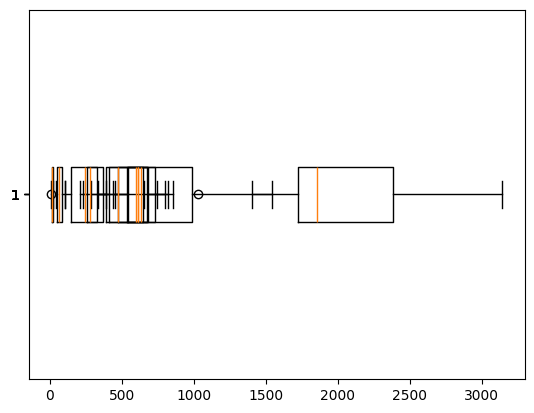

In [93]:
for mpk in materialPlantKey:
    data = temp[mpk]    
    B = plt.boxplot(data, vert=False)
    d = [item.get_ydata() for item in B['whiskers']]
    inventory_dict[mpk] = sorted(np.array([d[0][0], d[0][1],d[1][0], d[1][1], np.median(data)]))



[[1753.0, 1612.76, 1403.1012, 1613.56638, 1855.601337, 2078.27349744, 2348.4490521072, 2583.29395731792, 2505.79513859838, 2756.37465245822, 3142.26710380237, 2545.23635407992, 2265.26035513113, 1857.51349120753, 1746.06268173508, 1833.36581582183, 1723.36386687252, 1740.59750554124, 1688.37958037501, 1671.49578457126, 1671.49578457126, 1821.93040518267, 1949.46553354546, 2085.92812089364, 2398.81733902768, 2710.66359310128], [614.0, 656.98, 551.8632, 474.602352, 479.34837552, 412.2396029472, 383.382830740896, 322.041577822353, 309.159914709458, 315.343113003648, 261.734783793028, 264.352131630958, 216.768747937385, 229.774872813629, 257.347857551264, 229.039593220625, 199.264446101944, 169.374779186652, 171.068526978519, 140.276192122385, 119.234763304027, 115.657720404907, 108.718257180612, 119.590082898674, 135.136793675501, 108.109434940401], [794.0, 794.0, 857.52, 831.7944, 682.071408, 702.53355024, 667.406872728, 600.6661854552, 480.53294836416, 523.780913716934, 492.354058893918

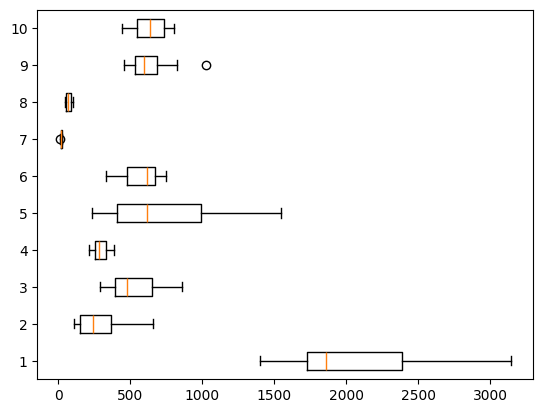

In [99]:
data = []
for mpk in materialPlantKey:
    data.append(temp[mpk])
materialPlantKey = ["10004","20004","10005","20005","10006","20006","20007","10007","10008","20008"]
safetystocks = [1000,300,500,100,600,200,30,15,450,200]
print(data)
plt.boxplot(data, vert=False)
plt.scatter(safetystocks,range(1,11))
plt.show()


In [92]:
with open("./data_arnaud.json", "w") as json_file:
    json.dump(inventory_dict, json_file,indent=2)